In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import numpy as np
import powerlaw
import math

In [2]:
%run Utilyties.ipynb

In [3]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  57896
* TOT Reply =  3000




In [4]:
print(G.number_of_nodes())
print(G.number_of_edges())

16675
52373


In [5]:
network_node_edge(G, 'G')

La rete G ha:

* Numero di nodi =  16675
* Numero di Edge =  52373


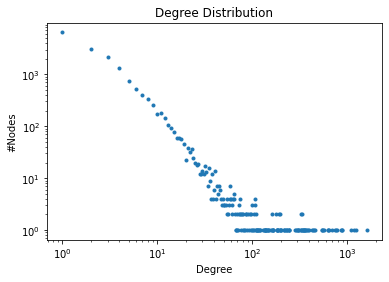

In [6]:
hist = nx.degree_histogram(G)
#print(hist)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [7]:
Degree=[]
n_nodes=[]

i=1
while i<len(hist):
    n_nodes.append(hist[i])
    Degree.append(i)
    i+=1
    
np.asarray(Degree)
np.asarray(n_nodes)

array([6399, 3025, 2112, ...,    0,    0,    1])

In [8]:
lung=len(Degree)
Degree_1=[]
n_nodes_1=[]
i=0
while (i<len(Degree)):
    if (Degree[i]>=3 and Degree[i]<=19): #per prendere la retta
        Degree_1.append(Degree[i])
        n_nodes_1.append(n_nodes[i])
    i+=1   

In [9]:
i=0
while(i<len(Degree_1)):
    if(Degree[i]!=0):
        Degree_1[i]=math.log(Degree_1[i])
    if(n_nodes_1[i]!=0):
        n_nodes_1[i]=math.log(n_nodes_1[i])
    i+=1

In [10]:
x=Degree_1
y=n_nodes_1

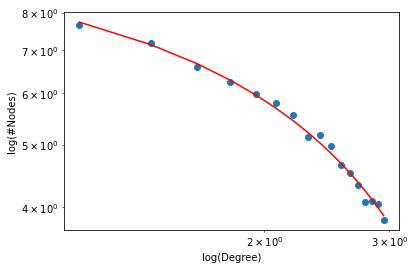

[0.04111596 0.09601721]
-2.085858162223415 10.02690366805585


In [11]:
p,cov = np.polyfit(x,y,1,cov=True)
plt.plot(x,y,'o')
plt.plot(x,np.polyval(p,x),'r')
plt.xlabel("log(Degree)")
plt.ylabel("log(#Nodes)")
plt.loglog()
plt.show()

print (np.sqrt(np.diag(cov)))
print(p[0], p[1])

In [12]:
a=[]
b=[]
c=[]
for i in range (len(x)):
    a.append(math.e**x[i])
    b.append(math.e**y[i])
    c.append(math.e**p[1]/(a[i]**(-p[0])))

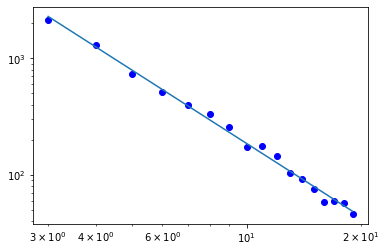

In [13]:
plt.plot(a,b, 'bo')
plt.plot(a, c)
plt.loglog()
plt.show()

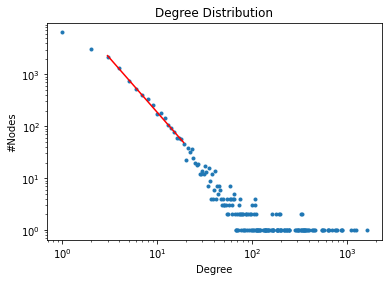

In [14]:
hist = nx.degree_histogram(G)
#print(hist)
plt.plot(range(0, len(hist)), hist, ".")
plt.plot(a, c, 'r')
#plt.plot(Degree, math.e**10.026903668055844/(Degree[i]**(2.0858581622234134)),'r')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [15]:
chi_squared = np.sum((np.polyval(p, x) - y) ** 2)
print(chi_squared/(len(x)-2))
print(len(x)-2)

0.008203799636315477
15
